# Import Library

In [ ]:
# 구글 코랩 연결
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
import matplotlib as mpl
import matplotlib.pyplot as plt 

In [ ]:
#연도와 날짜를 구분하는 함수 생성
def grap_year(data):
    data = str(data)
    return int(data[:4])

def grap_month(data):
    data = str(data)
    return int(data[4:])

In [ ]:
# 날짜 처리 ARIMQ용
data1 = pd.read_csv('/content/drive/My Drive/Colab Notebooks/여름방학 세미나/input/201901-202003.csv')
data1 = data1.fillna('')
#data1['year'] = data1['REG_YYMM'].apply(lambda x: grap_year(x))
#data1['month'] = data1['REG_YYMM'].apply(lambda x: grap_month(x))
#data1 = data1.drop(['REG_YYMM'], axis=1)

# ARMA 모형의 사용

### 라이브러리 불러오기

In [ ]:
# ARMA 모형 이건 나중에 삭제 ㄱㄱ
import statsmodels.tsa.arima_model as ARIMA
import statsmodels.tsa.api as tsa
import datetime
import statsmodels.formula.api as smf

In [ ]:
# 일단 이거는 나중에 사용해 보자
#list(np.expm1(np.log1p(submission.AMT.values+1)))*2

In [ ]:
#AMT값만 뽑아보자
#arma1.to_csv('/content/drive/My Drive/Colab Notebooks/여름방학 세미나/input/AMT.csv')

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARIMAResults

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# 데이터 정제
data2 = data1.drop(['CARD_CCG_NM', 'HOM_CCG_NM','FLC','HOM_SIDO_NM','AGE','SEX_CTGO_CD','CSTMR_CNT','CNT'], axis=1)

columns = ['REG_YYMM','CARD_SIDO_NM', 'STD_CLSS_NM']
data2 = data2.groupby(columns).sum().reset_index(drop=False)
data2

,REG_YYMM,CARD_SIDO_NM,STD_CLSS_NM,AMT
0,201901,강원,건강보조식품 소매업,148354746
1,201901,강원,골프장 운영업,1229200312
2,201901,강원,과실 및 채소 소매업,1286979106
3,201901,강원,관광 민예품 및 선물용품 소매업,30656770
4,201901,강원,그외 기타 스포츠시설 운영업,13101500
...,...,...,...,...
9433,202003,충북,피자 햄버거 샌드위치 및 유사 음식점업,1315245299
9434,202003,충북,한식 음식점업,16152482704
9435,202003,충북,호텔업,15248550
9436,202003,충북,화장품 및 방향제 소매업,428881434


In [ ]:
arma1 = np.log1p(data2['AMT'])
arma1

0       18.815117
1       20.929630
2       20.975564
3       17.238364
4       16.388237
          ...    
9433    20.997289
9434    23.505340
9435    16.539995
9436    19.876691
9437    16.359746
Name: AMT, Length: 9438, dtype: float64

In [ ]:
#data1['REG_YYMM'] = data1['year']*100 + data1['month'] 일단 필요X

### 잠시 다른거 해보자

In [ ]:
arma1name = data1[["REG_YYMM","CARD_SIDO_NM","STD_CLSS_NM"]]
#arma1name = data1[["REG_YYMM"]]
arma1names = arma1name.reset_index(drop= True)
arma1names

,REG_YYMM,CARD_SIDO_NM,STD_CLSS_NM
0,201901,강원,건강보조식품 소매업
1,201901,강원,건강보조식품 소매업
2,201901,강원,건강보조식품 소매업
3,201901,강원,건강보조식품 소매업
4,201901,강원,건강보조식품 소매업
...,...,...,...
24697787,202003,충북,휴양콘도 운영업
24697788,202003,충북,휴양콘도 운영업
24697789,202003,충북,휴양콘도 운영업
24697790,202003,충북,휴양콘도 운영업


In [ ]:
arma11 = pd.concat([arma1name, arma1], axis=1)
arma11

,REG_YYMM,CARD_SIDO_NM,STD_CLSS_NM,AMT
0,201901,강원,건강보조식품 소매업,12.648194
1,201901,강원,건강보조식품 소매업,14.133601
2,201901,강원,건강보조식품 소매업,13.615474
3,201901,강원,건강보조식품 소매업,14.356090
4,201901,강원,건강보조식품 소매업,13.861727
...,...,...,...,...
24697787,202003,충북,휴양콘도 운영업,10.675931
24697788,202003,충북,휴양콘도 운영업,10.463132
24697789,202003,충북,휴양콘도 운영업,12.144203
24697790,202003,충북,휴양콘도 운영업,11.502885


In [ ]:
arma11["AMT"]

0           12.648194
1           14.133601
2           13.615474
3           14.356090
4           13.861727
              ...    
24697787    10.675931
24697788    10.463132
24697789    12.144203
24697790    11.502885
24697791    12.175619
Name: AMT, Length: 24697792, dtype: float64

In [ ]:
arma = ARIMA(arma11["AMT"], order = (0,1,1))
arima = arma.fit(trend = 'nc', full_output = True, disp=1)
print(arima.summary())

                             ARIMA Model Results                              
Dep. Variable:                  D.AMT   No. Observations:             24697791
Model:                 ARIMA(0, 1, 1)   Log Likelihood           -41181945.160
Method:                       css-mle   S.D. of innovations              1.282
Date:                Thu, 23 Jul 2020   AIC                       82363894.320
Time:                        09:08:25   BIC                       82363924.365
Sample:                             1   HQIC                      82363901.658
                                                                              
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
ma.L1.D.AMT    -0.7750      0.000  -5523.119      0.000      -0.775      -0.775
                                    Roots                                    
                  Real          Imaginary         

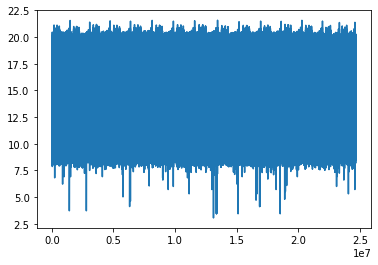

<Figure size 360x72 with 0 Axes>

In [ ]:
arma11["AMT"].plot()
plt.figure(figsize=(5,1))
plt.show()

In [ ]:
# 인코딩
dtypes = arma11.dtypes
encoders = {}
for column in arma11.columns:
    if str(dtypes[column]) == 'object':
        encoder = LabelEncoder()
        encoder.fit(arma11[column])
        encoders[column] = encoder
        
for column in encoders.keys():
    encoder = encoders[column]
    arma11[column] = encoder.transform(arma11[column])

In [ ]:
# 예측 템플릿 만들기
CARD_SIDO_NMs = arma11['CARD_SIDO_NM'].unique()
STD_CLSS_NMs  = arma11['STD_CLSS_NM'].unique()
REG_YYMMs     = [202004, 202007]

temp = []
for CARD_SIDO_NM in CARD_SIDO_NMs:
    for STD_CLSS_NM in STD_CLSS_NMs:
        for REG_YYMM in REG_YYMMs:
            temp.append([CARD_SIDO_NM, STD_CLSS_NM, REG_YYMM])
temp = np.array(temp)
temp = pd.DataFrame(data=temp, columns= ['REG_YYMM','CARD_SIDO_NM','STD_CLSS_NM'])

In [ ]:
temp

,REG_YYMM,CARD_SIDO_NM,STD_CLSS_NM
0,0,0,202004
1,0,0,202007
2,0,1,202004
3,0,1,202007
4,0,2,202004
...,...,...,...
1389,16,12,202007
1390,16,4,202004
1391,16,4,202007
1392,16,30,202004


In [ ]:
pred = lgb.predict(temp3)
pred = np.expm1(pred)
temp3['AMT'] = np.round(pred, 0)
temp3['REG_YYMM'] = temp3['year']*100 + temp3['month']
temp3 = temp3[['REG_YYMM', 'CARD_SIDO_NM', 'STD_CLSS_NM', 'AMT']]
temp3 = temp3.groupby(['REG_YYMM', 'CARD_SIDO_NM', 'STD_CLSS_NM']).sum().reset_index(drop=False)

### 다시 여기부터 시작

In [ ]:
# 한번 해보자
# 새롭게 만든 data2 인코딩
dtypes = data2.dtypes
encoders = {}
for column in data2.columns:
    if str(dtypes[column]) == 'object':
        encoder = LabelEncoder()
        encoder.fit(data2[column])
        encoders[column] = encoder
                
for column in encoders.keys():
    encoder = encoders[column]
    data2[column] = encoder.transform(data2[column])

data2.head()

,REG_YYMM,CARD_SIDO_NM,STD_CLSS_NM,AMT
0,201901,0,0,148354746
1,201901,0,1,1229200312
2,201901,0,2,1286979106
3,201901,0,3,30656770
4,201901,0,5,13101500


In [ ]:
data3 = data2.drop(['CARD_SIDO_NM',	'STD_CLSS_NM'	], axis=1)
data3.head()

,REG_YYMM,AMT
0,201901,148354746
1,201901,1229200312
2,201901,1286979106
3,201901,30656770
4,201901,13101500


In [ ]:
data3['year'] = data3['REG_YYMM'].apply(lambda x: grap_year(x))
data3['month'] = data3['REG_YYMM'].apply(lambda x: grap_month(x))

In [ ]:
data3

,REG_YYMM,AMT,year,month
0,201901,148354746,2019,1
1,201901,1229200312,2019,1
2,201901,1286979106,2019,1
3,201901,30656770,2019,1
4,201901,13101500,2019,1
...,...,...,...,...
9433,202003,1315245299,2020,3
9434,202003,16152482704,2020,3
9435,202003,15248550,2020,3
9436,202003,428881434,2020,3


In [ ]:
#data3의 날짜 값을 바꾸어보자
data3.to_csv('/content/drive/My Drive/Colab Notebooks/여름방학 세미나/input/AMT_DATE.csv')

<Figure size 3600x216 with 0 Axes>

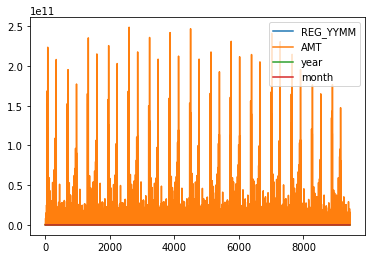

In [ ]:
#한번만 더
plt.figure(figsize=(50,3))
data3.plot()
plt.show()

In [ ]:
arma = ARIMA(data3["AMT"], order = (5,0,5))
arima = arma.fit(trend = 'nc', full_output = True, disp=1)
print(arima.summary())

                              ARMA Model Results                              
Dep. Variable:                    AMT   No. Observations:                 9438
Model:                     ARMA(5, 5)   Log Likelihood             -236158.062
Method:                       css-mle   S.D. of innovations    17810326480.355
Date:                Fri, 24 Jul 2020   AIC                         472338.124
Time:                        01:32:35   BIC                         472416.801
Sample:                             0   HQIC                        472364.832
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.AMT      1.1052      0.068     16.175      0.000       0.971       1.239
ar.L2.AMT     -0.2461      0.148     -1.663      0.096      -0.536       0.044
ar.L3.AMT      0.1632      0.154      1.063      0.2

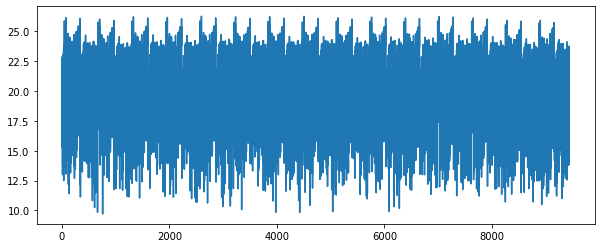

In [ ]:
# 여기서부터 찐 시작
plt.figure(figsize=(10,4))
arma1.plot()
plt.show()

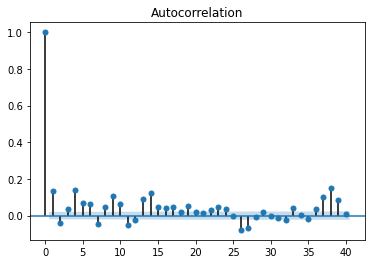

In [ ]:
plot_acf(arma1)
plt.show()

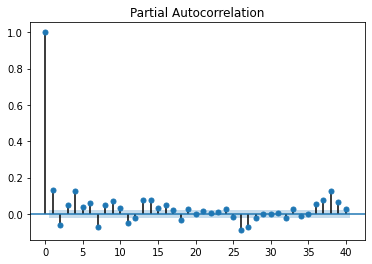

In [ ]:
plot_pacf(arma1)
plt.show()

In [ ]:
arma = ARIMA(arma1, order = (5,0,5))
arima = arma.fit(trend = 'nc', full_output = True, disp=1)
print(arima.summary())

                              ARMA Model Results                              
Dep. Variable:                    AMT   No. Observations:                 9438
Model:                     ARMA(5, 5)   Log Likelihood              -23325.608
Method:                       css-mle   S.D. of innovations              2.864
Date:                Fri, 24 Jul 2020   AIC                          46673.216
Time:                        01:33:33   BIC                          46751.894
Sample:                             0   HQIC                         46699.925
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.AMT      0.2188      0.007     31.533      0.000       0.205       0.232
ar.L2.AMT      0.0554      0.002     28.244      0.000       0.052       0.059
ar.L3.AMT     -0.2699        nan        nan        n

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/arima_model.py:1441: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(-inv(hess)))
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


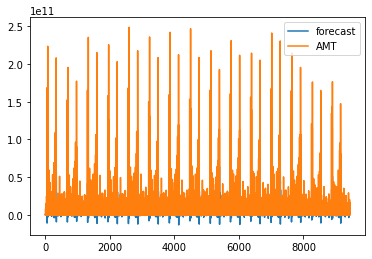

<Figure size 720x288 with 0 Axes>

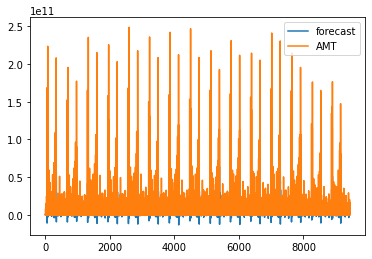

In [ ]:
plt.figure(figsize=(10,4))
arima.plot_predict()

In [ ]:
arima1 = arima.forecast(steps=1)
arima1

(19.688883628518628, array([2.86386248]), array([[14.0758163 , 25.30195095]]))

>

>

>